In [4]:
# Import appropriate modules
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import datetime
import numpy as np
import yfinance as yf
from datetime import datetime
import hvplot
import hvplot.pandas
import matplotlib.pyplot as plt


In [144]:
def retrieve_yahoo_data(ticker = 'spy', start_date = '2007-07-01', end_date = '2021-10-03'):
    try:
        # get data based on ticker
        yahoo_data = yf.Ticker(ticker)
        print(f"Processing Close {ticker}")
        # select data using start date and end data and calculate the daily return
        price_df = yahoo_data.history(start=start_date, end=end_date).Close
        price_df.name = ticker
        # if no data retrieved raise exception
        if price_df.shape[0] == 0:
            raise Exception("No Prices.")
        return price_df
    # handle exception
    except Exception as ex:
        print(f"Sorry, Data not available for '{ticker}': Exception is {ex}")

In [146]:
# Define function to retrieve ticker daily return data from yahoo using ticker, start date and end date
def retrieve_yahoo_data_volume(ticker = 'spy', start_date = '2007-07-01', end_date = '2021-10-03'):
    try:
        # get data based on ticker
        yahoo_data = yf.Ticker(ticker)
        print(f"Processing Volume {ticker}")
        # select data using start date and end data and calculate the daily return
        price_df = yahoo_data.history(start=start_date, end=end_date).Volume
        price_df.name = ticker
        # if no data retrieved raise exception
        if price_df.shape[0] == 0:
            raise Exception("No Prices.")
        return price_df
    # handle exception
    except Exception as ex:
        print(f"Sorry, Data not available for '{ticker}': Exception is {ex}")

In [158]:
# Define function to retrieve ticker daily return data from yahoo using ticker, start date and end date
def retrieve_yahoo_put_options_volume(ticker = 'spy', date = '2007-07-01'):
    try:
        # get data based on ticker
        yahoo_data = yf.Ticker(ticker)
        print(f"Processing put volume from {ticker}")
        # select data using start date and end data and calculate the daily return
        opts = yahoo_data.option_chain()
        price_df = opts.puts
        price_df.name = ticker
        price_df = price_df.volume
        # if no data retrieved raise exception
        if price_df.shape[0] == 0:
            raise Exception("No Prices.")
        return price_df
    # handle exception
    except Exception as ex:
        print(f"Sorry, Data not available for '{ticker}': Exception is {ex}")

In [178]:
# Set up the variable related to tickers and tickers data
ticker_data_dict = {}
volume_data_dict = {}
put_volume_data_dict = {}
ticker_list = ["^VIX", "spy", "DX-Y.NYB", "tlt", "ief", "gld", "slv", "CL=F", "USDJPY=X", "VXX", "FXI", "EZU", "EEM", "EFA"]
volume_list = ["^VIX", "spy", "DX-Y.NYB", "tlt", "ief", "gld", "slv", "VXX", "FXI", "EZU", "EEM", "EFA"]
put_volume_list = ["spy", "gld", "VXX", "FXI", "EZU", "EFA"]

# Retrieve Tickers
def retrieve_tickers(ticker_data_dict, ticker_list):
    for ticker in ticker_list:
        ticker_data = retrieve_yahoo_data(ticker)
        ticker_data_dict[ticker] = ticker_data
    return ticker_data_dict

# Retrieve Volume
def retrieve_volume(volume_data_dict, volume_list):
    for ticker in volume_list:        
        volume_data = retrieve_yahoo_data_volume(ticker)
        volume_data_dict[ticker] = volume_data
    return volume_data_dict

# Retrieve Tickers
def retrieve_put_volume(put_volume_data_dict, put_volume_list):
    for ticker in put_volume_list:
        put_volume_data=retrieve_yahoo_put_options_volume(ticker)
        put_volume_data_dict[ticker] = put_volume_data
    return put_volume_data_dict
        


In [179]:
ticker_data_dict  = retrieve_tickers(ticker_data_dict, ticker_list)
volume_data_dict  = retrieve_volume(volume_data_dict, volume_list)
# put_volume_data_dict = retrieve_put_volume(put_volume_data_dict, put_volume_list)

ticker_data_df     = pd.DataFrame(ticker_data_dict)
volume_data_df     = pd.DataFrame(volume_data_dict)
# put_volume_data_df = pd.DataFrame(put_volume_data_dict)

# ticker_data_df = ticker_data_df.dropna()
# Display the ticker data related data frame
print(ticker_data_df.head())
print(volume_data_df.head())
# print(put_volume_data_df.head())

Processing Close ^VIX
Processing Close spy
Processing Close DX-Y.NYB
Processing Close tlt
Processing Close ief
Processing Close gld
Processing Close slv
Processing Close CL=F
Processing Close USDJPY=X
Processing Close VXX
Processing Close FXI
Processing Close EZU
Processing Close EEM
Processing Close EFA
Processing Volume ^VIX
Processing Volume spy
Processing Volume DX-Y.NYB
Processing Volume tlt
Processing Volume ief
Processing Volume gld
Processing Volume slv
Processing Volume VXX
Processing Volume FXI
Processing Volume EZU
Processing Volume EEM
Processing Volume EFA
Processing put volume from spy
Processing put volume from gld
Processing put volume from VXX
Processing put volume from FXI
Processing put volume from EZU
Processing put volume from EFA
             ^VIX         spy   DX-Y.NYB        tlt        ief        gld  \
Date                                                                        
2007-07-02  15.40  114.157898  81.389999  56.094921  58.102333  65.019997   
2007-07

In [184]:
# Volume data do not have the date - it looks a little complicated to understand per now. 
# Will focus in other variables
put_volume_data_df.tail(20)

,spy,gld,VXX,FXI,EZU,EFA
118,16.0,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN
120,10.0,NaN,NaN,NaN,NaN,NaN
121,9.0,NaN,NaN,NaN,NaN,NaN
122,1.0,NaN,NaN,NaN,NaN,NaN
123,1.0,NaN,NaN,NaN,NaN,NaN
124,12.0,NaN,NaN,NaN,NaN,NaN
125,48.0,NaN,NaN,NaN,NaN,NaN
126,8.0,NaN,NaN,NaN,NaN,NaN
127,10.0,NaN,NaN,NaN,NaN,NaN


In [185]:
returns_df=ticker_data_df.pct_change()
returns_all_but_VIX=returns_df.drop(columns=['^VIX'])

In [186]:
cum_returns=(1+returns_df).cumprod()
cum_returns_all_but_vix=(1+returns_all_but_VIX).cumprod()
cum_returns_all_but_vix

,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,VXX,FXI,EZU,EEM,EFA
Date,,,,,,,,,,,,,
2007-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-03,1.003623,1.000000,0.993903,0.997033,0.995694,0.995551,1.000000,1.001963,NaN,1.020957,1.006444,1.007967,1.004760
2007-07-04,1.003623,1.000000,0.993903,0.997033,0.995694,0.995551,1.000000,1.003518,NaN,1.020957,1.006444,1.007967,1.004760
2007-07-05,1.002569,1.001843,0.982765,0.991470,0.990772,0.990229,1.010128,1.005890,NaN,1.017375,1.001256,1.012435,0.999756
2007-07-06,1.007840,1.000860,0.978779,0.989122,0.999077,1.007309,1.024195,1.009245,NaN,1.042905,1.012135,1.029784,1.006957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,3.877437,1.147315,2.606018,1.984772,2.516764,1.663489,1.061331,0.906193,0.224331,1.224108,1.278120,1.516357,1.496870
2021-09-28,3.799299,1.152107,2.565425,1.977204,2.492310,1.650779,1.059080,0.907829,0.247740,1.225686,1.247640,1.496776,1.464228
2021-09-29,3.805694,1.159110,2.569876,1.979268,2.481083,1.584843,1.052609,0.912444,0.251356,1.216850,1.241492,1.482832,1.460871


In [192]:
# Are levels correlated? -- YES
ticker_data_df.corr()

,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,VXX,FXI,EZU,EEM,EFA
^VIX,1.000000,-0.261907,-0.177535,-0.153038,-0.238696,-0.140994,-0.116533,-0.154325,-0.236938,0.375032,-0.372784,-0.412653,-0.459856,-0.457462
spy,-0.261907,1.000000,0.694249,0.885115,0.866796,0.482224,-0.112768,-0.481942,0.529305,-0.868761,0.743588,0.813923,0.791792,0.924471
DX-Y.NYB,-0.177535,0.694249,1.000000,0.770689,0.754411,0.123592,-0.455048,-0.830481,0.676866,0.274011,0.380284,0.377936,0.239417,0.541566
tlt,-0.153038,0.885115,0.770689,1.000000,0.982691,0.623439,-0.040164,-0.623989,0.398247,-0.356806,0.529986,0.525915,0.571650,0.716657
ief,-0.238696,0.866796,0.754411,0.982691,1.000000,0.680952,0.045964,-0.569718,0.344841,-0.469316,0.493251,0.491168,0.581632,0.706152
gld,-0.140994,0.482224,0.123592,0.623439,0.680952,1.000000,0.714587,-0.023258,-0.360724,-0.539503,0.256068,0.149087,0.545887,0.340552
slv,-0.116533,-0.112768,-0.455048,-0.040164,0.045964,0.714587,1.000000,0.477390,-0.711848,-0.681930,-0.082024,-0.188611,0.238945,-0.117819
CL=F,-0.154325,-0.481942,-0.830481,-0.623989,-0.569718,-0.023258,0.477390,1.000000,-0.514512,-0.340802,-0.226999,-0.154737,-0.013454,-0.270516
USDJPY=X,-0.236938,0.529305,0.676866,0.398247,0.344841,-0.360724,-0.711848,-0.514512,1.000000,0.049850,0.483720,0.627805,0.239002,0.609633
VXX,0.375032,-0.868761,0.274011,-0.356806,-0.469316,-0.539503,-0.681930,-0.340802,0.049850,1.000000,-0.434935,-0.799413,-0.729892,-0.845607


# Observations:
Correlations among levels are particularly high for international/Emergin markets iShares with the VIX: EZU, EFA, EEM, FXI

In [188]:
#Are returns correlated? YES, the most
returns_df.corr()

,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,VXX,FXI,EZU,EEM,EFA
^VIX,1.000000,-0.719044,0.093661,0.334189,0.344312,-0.010204,-0.164473,-0.130616,-0.110360,0.886326,-0.532608,-0.641795,-0.609863,-0.661368
spy,-0.719044,1.000000,-0.182516,-0.431963,-0.430174,0.031201,0.220519,0.173980,0.212614,-0.774009,0.743652,0.862075,0.855059,0.905054
DX-Y.NYB,0.093661,-0.182516,1.000000,0.011808,-0.053912,-0.406660,-0.418170,-0.101696,0.051795,0.072226,-0.157699,-0.425560,-0.263495,-0.373556
tlt,0.334189,-0.431963,0.011808,1.000000,0.911064,0.153197,-0.007242,-0.120435,-0.128968,0.280662,-0.331865,-0.415523,-0.363277,-0.407927
ief,0.344312,-0.430174,-0.053912,0.911064,1.000000,0.192800,0.026679,-0.105578,-0.190354,0.311780,-0.360441,-0.401192,-0.376332,-0.396661
gld,-0.010204,0.031201,-0.406660,0.153197,0.192800,1.000000,0.794172,0.071690,-0.037653,-0.066436,0.065263,0.119885,0.141020,0.120403
slv,-0.164473,0.220519,-0.418170,-0.007242,0.026679,0.794172,1.000000,0.124697,0.002264,-0.227686,0.207590,0.288911,0.295210,0.298046
CL=F,-0.130616,0.173980,-0.101696,-0.120435,-0.105578,0.071690,0.124697,1.000000,0.035922,-0.163233,0.128049,0.165415,0.164338,0.171508
USDJPY=X,-0.110360,0.212614,0.051795,-0.128968,-0.190354,-0.037653,0.002264,0.035922,1.000000,-0.013628,0.235700,0.176781,0.233973,0.193523
VXX,0.886326,-0.774009,0.072226,0.280662,0.311780,-0.066436,-0.227686,-0.163233,-0.013628,1.000000,-0.576786,-0.732491,-0.686129,-0.737599


In [189]:
# Is the VIX level correlated with returns? -- Not so much. It's much more correlated with levels,
# or vIX returns correlated with returns

vix_level_and_price_returns_df=pd.concat([ticker_data_df['^VIX'],returns_all_but_VIX], axis=1)
vix_level_and_price_returns_df.corr()

,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,VXX,FXI,EZU,EEM,EFA
^VIX,1.000000,-0.136983,0.037840,0.071525,0.080747,0.017460,-0.024428,-0.075762,-0.054239,0.223272,-0.065210,-0.114231,-0.080981,-0.116769
spy,-0.136983,1.000000,-0.182516,-0.431963,-0.430174,0.031201,0.220519,0.173980,0.212614,-0.774009,0.743652,0.862075,0.855059,0.905054
DX-Y.NYB,0.037840,-0.182516,1.000000,0.011808,-0.053912,-0.406660,-0.418170,-0.101696,0.051795,0.072226,-0.157699,-0.425560,-0.263495,-0.373556
tlt,0.071525,-0.431963,0.011808,1.000000,0.911064,0.153197,-0.007242,-0.120435,-0.128968,0.280662,-0.331865,-0.415523,-0.363277,-0.407927
ief,0.080747,-0.430174,-0.053912,0.911064,1.000000,0.192800,0.026679,-0.105578,-0.190354,0.311780,-0.360441,-0.401192,-0.376332,-0.396661
gld,0.017460,0.031201,-0.406660,0.153197,0.192800,1.000000,0.794172,0.071690,-0.037653,-0.066436,0.065263,0.119885,0.141020,0.120403
slv,-0.024428,0.220519,-0.418170,-0.007242,0.026679,0.794172,1.000000,0.124697,0.002264,-0.227686,0.207590,0.288911,0.295210,0.298046
CL=F,-0.075762,0.173980,-0.101696,-0.120435,-0.105578,0.071690,0.124697,1.000000,0.035922,-0.163233,0.128049,0.165415,0.164338,0.171508
USDJPY=X,-0.054239,0.212614,0.051795,-0.128968,-0.190354,-0.037653,0.002264,0.035922,1.000000,-0.013628,0.235700,0.176781,0.233973,0.193523
VXX,0.223272,-0.774009,0.072226,0.280662,0.311780,-0.066436,-0.227686,-0.163233,-0.013628,1.000000,-0.576786,-0.732491,-0.686129,-0.737599


In [ ]:
# VIX returns and volume level is very low
all_returns_and_volume_df=pd.concat([returns_df, volume_data_df], axis=1)
all_returns_and_volume_df.corr()

In [ ]:
# VIX returns and volume change correlation are not significant
all_returns_and_volume_change_df=pd.concat([returns_df, volume_data_df.pct_change()], axis=1)
all_returns_and_volume_df.corr()

In [196]:
# Vix level and volume change -- very low correlation
vix_level_and_volume_change_df=pd.concat([ticker_data_df['^VIX'],volume_data_df.pct_change()], axis=1)
vix_level_and_volume_change_df.corr()

,^VIX,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,VXX,FXI,EZU,EEM,EFA
^VIX,1.000000,NaN,0.020026,NaN,0.019380,-0.024221,-0.008238,-0.006052,-0.049974,-0.004497,-0.004458,0.006706,0.000192
^VIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spy,0.020026,NaN,1.000000,NaN,0.460702,0.103050,0.403605,0.289026,0.096861,0.459318,0.092076,0.592710,0.542632
DX-Y.NYB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tlt,0.019380,NaN,0.460702,NaN,1.000000,0.117285,0.355660,0.254585,0.043232,0.252123,0.042284,0.361316,0.324541
ief,-0.024221,NaN,0.103050,NaN,0.117285,1.000000,0.042635,0.029484,0.055147,0.051070,0.037119,0.093583,0.070051
gld,-0.008238,NaN,0.403605,NaN,0.355660,0.042635,1.000000,0.618492,0.034386,0.254789,0.034951,0.364966,0.281732
slv,-0.006052,NaN,0.289026,NaN,0.254585,0.029484,0.618492,1.000000,0.018101,0.251697,0.032854,0.313790,0.198161
VXX,-0.049974,NaN,0.096861,NaN,0.043232,0.055147,0.034386,0.018101,1.000000,0.059170,0.013715,0.075840,0.128335
FXI,-0.004497,NaN,0.459318,NaN,0.252123,0.051070,0.254789,0.251697,0.059170,1.000000,0.045698,0.579851,0.328895


In [197]:
# Vix level and volume change
vix_level_and_volume_df=pd.concat([ticker_data_df['^VIX'],volume_data_df], axis=1)
vix_level_and_volume_df.corr()

,^VIX,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,VXX,FXI,EZU,EEM,EFA
^VIX,1.000000,NaN,0.729169,-0.008396,-0.015544,0.000935,0.390068,0.135834,0.151463,0.470285,-0.182045,0.414648,0.470047
^VIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spy,0.729169,NaN,1.000000,0.002924,-0.046283,-0.217987,0.524100,0.042868,0.130699,0.500993,-0.267414,0.594146,0.376161
DX-Y.NYB,-0.008396,NaN,0.002924,1.000000,0.005505,-0.008652,-0.002241,-0.009548,NaN,-0.006670,0.128083,0.010168,-0.009000
tlt,-0.015544,NaN,-0.046283,0.005505,1.000000,0.557124,0.201424,0.301201,0.518686,0.159572,0.288010,0.177870,0.419974
ief,0.000935,NaN,-0.217987,-0.008652,0.557124,1.000000,-0.031462,0.176520,0.455639,0.134773,0.305947,0.035204,0.332827
gld,0.390068,NaN,0.524100,-0.002241,0.201424,-0.031462,1.000000,0.438859,0.181183,0.278680,-0.181187,0.374205,0.303926
slv,0.135834,NaN,0.042868,-0.009548,0.301201,0.176520,0.438859,1.000000,0.289434,0.011899,-0.051299,0.017222,0.132257
VXX,0.151463,NaN,0.130699,NaN,0.518686,0.455639,0.181183,0.289434,1.000000,0.030863,-0.123935,-0.168446,0.061014
FXI,0.470285,NaN,0.500993,-0.006670,0.159572,0.134773,0.278680,0.011899,0.030863,1.000000,0.128425,0.725271,0.580199


In [198]:
# Same as with returns
vix_level_and_cum_price_returns_df=pd.concat([ticker_data_df['^VIX'],cum_returns_all_but_vix], axis=1)
vix_level_and_cum_price_returns_df.corr()

,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,VXX,FXI,EZU,EEM,EFA
^VIX,1.000000,-0.262041,-0.178489,-0.153331,-0.239156,-0.141415,-0.116698,-0.154724,-0.236113,0.374093,-0.372870,-0.412586,-0.459930,-0.457451
spy,-0.262041,1.000000,0.694508,0.885289,0.867092,0.481425,-0.113267,-0.480653,0.525528,-0.868670,0.744898,0.814374,0.791834,0.924717
DX-Y.NYB,-0.178489,0.694508,1.000000,0.770235,0.754210,0.122933,-0.454054,-0.828409,0.667626,0.267527,0.380465,0.377631,0.240075,0.541523
tlt,-0.153331,0.885289,0.770235,1.000000,0.982707,0.622268,-0.040824,-0.622110,0.392486,-0.363010,0.530828,0.526749,0.571720,0.717152
ief,-0.239156,0.867092,0.754210,0.982707,1.000000,0.679812,0.045261,-0.567531,0.338265,-0.474758,0.494385,0.492196,0.581857,0.706845
gld,-0.141415,0.481425,0.122933,0.622268,0.679812,1.000000,0.714993,-0.020299,-0.363027,-0.542889,0.257355,0.149678,0.546478,0.340775
slv,-0.116698,-0.113267,-0.454054,-0.040824,0.045261,0.714993,1.000000,0.478520,-0.712142,-0.681076,-0.081079,-0.188393,0.239236,-0.117659
CL=F,-0.154724,-0.480653,-0.828409,-0.622110,-0.567531,-0.020299,0.478520,1.000000,-0.501147,-0.334776,-0.224262,-0.153102,-0.011567,-0.268554
USDJPY=X,-0.236113,0.525528,0.667626,0.392486,0.338265,-0.363027,-0.712142,-0.501147,1.000000,0.052021,0.481712,0.627137,0.236679,0.606907
VXX,0.374093,-0.868670,0.267527,-0.363010,-0.474758,-0.542889,-0.681076,-0.334776,0.052021,1.000000,-0.437148,-0.797584,-0.727571,-0.844179


In [203]:
# Vix level and cuadratic returns -- YES, STRONG CORRELATIONS WITH SEVERAL OF THEM
cuadratic_returns_all_but_VIX=returns_all_but_VIX**2
vix_level_and_cuadratic_price_returns_df=pd.concat([ticker_data_df['^VIX'],cuadratic_returns_all_but_VIX], axis=1)
vix_level_and_cuadratic_price_returns_df.corr()
high_correlation_with_vix_level=vix_level_and_cuadratic_price_returns_df[^VIX].loc[vix_level_and_cuadratic_price_returns_df[^VIX]>.20]

SyntaxError: invalid syntax (<ipython-input-203-437b86d09680>, line 5)

In [ ]:
#VIX return and returns squared of securities -- not very much
vix_return_and_cuadratic_price_returns_df=pd.concat([ticker_data_df['^VIX'].pct_change(),cuadratic_returns_all_but_VIX], axis=1)
vix_return_and_cuadratic_price_returns_df.corr()

In [10]:
vix_level_adjusted=ticker_data_df['^VIX']/10
vix_level_adjusted.hvplot()

:Curve   [Date]   (^VIX)

In [11]:
vix_level_adj_and_cum_price_returns_df=pd.concat([vix_level_adjusted,cum_returns_all_but_vix], axis=1)
vix_level_adj_and_cum_price_returns_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [9]:
ticker_data_df[["^VIX", "VXX"]].dropna().hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [10]:
VIX_and_VXX_for_plot=pd.concat([ticker_data_df["^VIX"], ticker_data_df["VXX"]/5],axis=1).dropna()
VIX_and_VXX_for_plot.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [14]:
VIX_and_VXX_for_plot=pd.concat([ticker_data_df["^VIX"], ticker_data_df["VXX"]],axis=1).dropna()
returns_vix_and_vxx=VIX_and_VXX_for_plot.pct_change().dropna()
returns_vix_and_vxx.head()

,^VIX,VXX
Date,,
2018-01-29,0.195164,0.069414
2018-01-30,0.068642,0.032792
2018-01-31,-0.084517,0.003273
2018-02-01,-0.005170,-0.050343
2018-02-02,0.285078,0.128594


In [15]:
# Cases of interest
# When both go up together
vix_and_vxx_positive_df=returns_vix_and_vxx[(returns_vix_and_vxx["^VIX"]*returns_vix_and_vxx['VXX']>0) & 
                     (returns_vix_and_vxx["^VIX"]>0)]

In [16]:
# It is 3% a good threshold? It would if most of the time vxx is also positive when vix is above threshold
results=[]

for threshold_bps in range(150,1000,5):
    threshold=threshold_bps/10000
    returns_vxx_negative_with_vix_above_threshold=returns_vix_and_vxx[(returns_vix_and_vxx["^VIX"]>threshold) &
                                                                  (returns_vix_and_vxx["VXX"]<0)]

                                                                  
    cases_vxx_negative_and_vix_above_threshold=returns_vxx_negative_with_vix_above_threshold.describe().iloc[0,0]
    cases_vix_above_threshold=returns_vix_and_vxx[returns_vix_and_vxx["^VIX"]>threshold].describe().iloc[0,0]
    
    results.append({'Threshold return (%)':threshold*100, 
                     "cases_vxx_negative_and_vix_above_threshold":cases_vxx_negative_and_vix_above_threshold,
                     "cases_vix_above_threshold":cases_vix_above_threshold,
                     "Proportion of fail cases (%)": cases_vxx_negative_and_vix_above_threshold/cases_vix_above_threshold*100
                    })
    
results_df=pd.DataFrame(results)

results_df.head(50)

,Threshold return (%),cases_vxx_negative_and_vix_above_threshold,cases_vix_above_threshold,Proportion of fail cases (%)
0,1.50,38.0,334.0,11.377246
1,1.55,38.0,333.0,11.411411
2,1.60,37.0,330.0,11.212121
3,1.65,36.0,325.0,11.076923
4,1.70,36.0,323.0,11.145511
5,1.75,36.0,320.0,11.250000
6,1.80,32.0,316.0,10.126582
7,1.85,30.0,312.0,9.615385
8,1.90,29.0,311.0,9.324759
9,1.95,27.0,309.0,8.737864


In [17]:
curve=results_df.hvplot(x='Threshold return (%)', 
                  y='Proportion of fail cases (%)',
                  title='Determination of Threshold for VIX return prediction'
                 )
amount_of_cases=results_df[(results_df['Threshold return (%)']>2) &
                           (results_df['Threshold return (%)']<4)].hvplot.bar(x='Threshold return (%)', 
                  y=['cases_vxx_negative_and_vix_above_threshold','cases_vix_above_threshold'],
                  title='Determination of Threshold for VIX return prediction'
                 )
curve+amount_of_cases

:Layout
   .Curve.I :Curve   [Threshold return (%)]   (Proportion of fail cases (%))
   .Bars.I  :Bars   [Threshold return (%),Variable]   (value)

In [124]:
# Read the google_trends_df.csv file from the Resources folder into a Pandas DataFrame
df_path = Path("./Resources/google_trends_df.csv")
google_trends_df = pd.read_csv(df_path,index_col= 'Date', parse_dates= True, infer_datetime_format=True)

# Review the DataFrame
google_trends_df.hvplot.heatmap(height=500, rot=90)


:HeatMap   [columns,index]   (value)

In [12]:
# Review the data types associated with the columns
google_trends_df.dtypes

Leading_Indicators      int64
PMI                     int64
CCI                     int64
Jobless_Claims          int64
GDP                     int64
war                     int64
Impeachment             int64
Catastrophe             int64
Natural_disaster        int64
Inflation               int64
unemployment            int64
Market_crash            int64
Covid                   int64
virus                   int64
Pandemic                int64
vaccination             int64
Delta                   int64
Covid_mutation          int64
FED                     int64
Tapering                int64
Liquidity               int64
Banking                 int64
Correction_of_market    int64
coup                    int64
Debt_ceiling            int64
retail_spending         int64
Consumer_spending       int64
Consumer                int64
Earnings                int64
Economic_contraction    int64
Depression              int64
Shock                   int64
Monetary_policy         int64
VIX       

In [16]:
ticker_data_df1= ticker_data_df.drop(columns="VXX")
gtd_tdf = pd.concat([ticker_data_df1.pct_change(),google_trends_df],axis=1).dropna()
gtd_tdf.head()

,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,FXI,...,Debt_ceiling,retail_spending,Consumer_spending,Consumer,Earnings,Economic_contraction,Depression,Shock,Monetary_policy,VIX
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-01,0.006378,0.004872,0.001238,-0.002164,-0.002771,0.002128,0.006874,-0.021481,0.004729,-0.019370,...,0.0,0.0,0.0,61.0,46.0,0.0,18.0,25.0,0.0,21.0
2007-10-01,-0.008889,0.011273,0.002316,0.005714,0.001197,0.005305,-0.000659,-0.017389,0.009238,0.029167,...,0.0,0.0,24.0,63.0,69.0,0.0,25.0,15.0,25.0,10.0
2007-11-01,0.252563,-0.023407,0.001438,0.012993,0.008162,-0.008776,-0.024861,-0.011002,-0.008060,-0.046589,...,0.0,0.0,0.0,58.0,40.0,0.0,29.0,30.0,25.0,16.0
2008-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001523,0.000000,...,0.0,0.0,0.0,58.0,58.0,0.0,49.0,14.0,0.0,18.0
2008-02-01,-0.083206,0.016088,0.003591,0.006011,0.003246,-0.022429,-0.011833,-0.030409,0.002438,0.046020,...,0.0,0.0,0.0,56.0,64.0,0.0,39.0,21.0,16.0,6.0


In [23]:
correlations_with_vix=gtd_tdf.corr().loc["^VIX"].sort_values(ascending=False)
correlations_with_vix

^VIX                    1.000000
ief                     0.527566
tlt                     0.508151
Leading_Indicators      0.237956
CCI                     0.216207
virus                   0.139178
war                     0.132465
Jobless_Claims          0.104248
GDP                     0.098281
DX-Y.NYB                0.083312
gld                     0.075658
VIX                     0.057131
Banking                 0.052083
Correction_of_market    0.044169
Delta                   0.040979
Depression              0.039105
Market_crash            0.036494
Consumer                0.036146
PMI                     0.023457
Pandemic                0.022354
FED                     0.013454
Shock                   0.012379
Inflation              -0.002075
Catastrophe            -0.019197
Impeachment            -0.019684
Liquidity              -0.027039
Consumer_spending      -0.030640
Covid                  -0.032681
retail_spending        -0.037443
Monetary_policy        -0.049563
USDJPY=X  

In [116]:
#lagged correlations. gtd_t1df means trends in in t-1, but VIX in t
#vix_trends_lag1_df=pd.concat([google_trends_df.shift(-1), 

ret_and_trends_no_vix=gtd_tdf.drop(columns='^VIX')
ret_and_trends_no_vix_lag1=ret_and_trends_no_vix.shift(-1)
ret_and_trends_no_vix_lag2=ret_and_trends_no_vix.shift(-2)
ret_and_trends_no_vix_lag3=ret_and_trends_no_vix.shift(-3)
ret_and_trends_no_vix_lag4=ret_and_trends_no_vix.shift(-4)
ret_and_trends_no_vix_lag5=ret_and_trends_no_vix.shift(-5)
ret_and_trends_no_vix_lag6=ret_and_trends_no_vix.shift(-6)
ret_and_trends_no_vix_lag7=ret_and_trends_no_vix.shift(-7)
vix=gtd_tdf['^VIX']

vix_ret_trends_lagged_correlation=pd.DataFrame()

vix_ret_trends_1=pd.concat([vix,ret_and_trends_no_vix_lag1],axis=1)
vix_ret_trends_2=pd.concat([vix,ret_and_trends_no_vix_lag2],axis=1)
vix_ret_trends_3=pd.concat([vix,ret_and_trends_no_vix_lag3],axis=1)
vix_ret_trends_4=pd.concat([vix,ret_and_trends_no_vix_lag4],axis=1)
vix_ret_trends_5=pd.concat([vix,ret_and_trends_no_vix_lag5],axis=1)
vix_ret_trends_6=pd.concat([vix,ret_and_trends_no_vix_lag6],axis=1)

vix_ret_trends_lagged_correlation[1]=vix_ret_trends_1.corr()['^VIX']
vix_ret_trends_lagged_correlation[2]=vix_ret_trends_2.corr()['^VIX']
vix_ret_trends_lagged_correlation[3]=vix_ret_trends_3.corr()['^VIX']
vix_ret_trends_lagged_correlation[4]=vix_ret_trends_4.corr()['^VIX']
vix_ret_trends_lagged_correlation[5]=vix_ret_trends_5.corr()['^VIX']
vix_ret_trends_lagged_correlation[6]=vix_ret_trends_6.corr()['^VIX']

vix_ret_trends_lagged_correlation.hvplot.heatmap(height=550)


:HeatMap   [columns,index]   (value)

,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,FXI,EZU,...,Debt_ceiling,retail_spending,Consumer_spending,Consumer,Earnings,Economic_contraction,Depression,Shock,Monetary_policy,VIX
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-01,0.011273,0.002316,0.005714,0.001197,0.005305,-0.000659,-0.017389,0.009238,0.029167,0.012904,...,0.0,0.0,24.0,63.0,69.0,0.0,25.0,15.0,25.0,10.0
2007-10-01,-0.023407,0.001438,0.012993,0.008162,-0.008776,-0.024861,-0.011002,-0.008060,-0.046589,-0.024431,...,0.0,0.0,0.0,58.0,40.0,0.0,29.0,30.0,25.0,16.0
2007-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001523,0.000000,0.000000,...,0.0,0.0,0.0,58.0,58.0,0.0,49.0,14.0,0.0,18.0
2008-01-01,0.016088,0.003591,0.006011,0.003246,-0.022429,-0.011833,-0.030409,0.002438,0.046020,0.017196,...,0.0,0.0,0.0,56.0,64.0,0.0,39.0,21.0,16.0,6.0
2008-02-01,0.035160,0.010585,-0.016275,-0.008744,-0.039266,-0.025879,-0.005907,0.000000,0.074515,0.030699,...,0.0,0.0,44.0,59.0,64.0,100.0,37.0,27.0,53.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,-0.000881,-0.002221,-0.000224,-0.000184,-0.002691,-0.002317,0.021110,-0.003767,0.026168,0.006901,...,0.0,0.0,5.0,43.0,33.0,0.0,17.0,21.0,5.0,18.0
2021-06-01,0.005537,0.001731,0.000055,-0.000719,0.003441,-0.004542,0.023955,0.005329,-0.005180,0.003850,...,1.0,0.0,5.0,46.0,47.0,0.0,27.0,31.0,10.0,17.0
2021-07-01,0.000531,-0.001943,0.001675,0.000427,0.000059,0.010389,0.001314,0.001019,0.022228,0.009837,...,12.0,0.0,5.0,45.0,65.0,0.0,28.0,20.0,14.0,19.0


In [204]:
vix_ret_trends_1.corr()['^VIX'].sort_values(ascending=False)
print(vix_ret_trends_1.corr()['^VIX'].sort_values(ascending=False).head(5))
print(vix_ret_trends_1.corr()['^VIX'].sort_values(ascending=False).tail(5))
print("lag1")

^VIX                  1.000000
Leading_Indicators    0.131688
war                   0.114397
Debt_ceiling          0.112854
CL=F                  0.085831
Name: ^VIX, dtype: float64
retail_spending   -0.086460
Monetary_policy   -0.112374
vaccination       -0.128992
Shock             -0.166594
FED               -0.169568
Name: ^VIX, dtype: float64
lag1


In [205]:
vix_ret_trends_2=pd.concat([vix,ret_and_trends_no_vix_lag2],axis=1)

vix_ret_trends_2.corr()['^VIX'].sort_values(ascending=False)
print("lag2")
print(vix_ret_trends_2.corr()['^VIX'].sort_values(ascending=False).head(5))
print(vix_ret_trends_2.corr()['^VIX'].sort_values(ascending=False).tail(3))

lag2
^VIX               1.000000
Monetary_policy    0.188572
GDP                0.181515
EFA                0.166613
Impeachment        0.164921
Name: ^VIX, dtype: float64
CL=F              -0.114323
retail_spending   -0.127028
vaccination       -0.133738
Name: ^VIX, dtype: float64


In [206]:
vix_ret_trends_3=pd.concat([vix,ret_and_trends_no_vix_lag3],axis=1)

vix_ret_trends_3.corr()['^VIX'].sort_values(ascending=False)
print("lag3")
print(vix_ret_trends_3.corr()['^VIX'].sort_values(ascending=False).head(5))
print(vix_ret_trends_3.corr()['^VIX'].sort_values(ascending=False).tail(3))

lag3
^VIX                    1.000000
Economic_contraction    0.296610
Monetary_policy         0.199377
Jobless_Claims          0.186807
Earnings                0.183834
Name: ^VIX, dtype: float64
vaccination          -0.141649
tlt                  -0.141798
Leading_Indicators   -0.150776
Name: ^VIX, dtype: float64


In [207]:
vix_ret_trends_4=pd.concat([vix,ret_and_trends_no_vix_lag4],axis=1)

vix_ret_trends_4.corr()['^VIX'].sort_values(ascending=False)
print("lag4")
print(vix_ret_trends_4.corr()['^VIX'].sort_values(ascending=False).head(5))
print(vix_ret_trends_4.corr()['^VIX'].sort_values(ascending=False).tail(3))

lag4
^VIX         1.000000
USDJPY=X     0.215979
Inflation    0.161238
DX-Y.NYB     0.150253
virus        0.145938
Name: ^VIX, dtype: float64
retail_spending   -0.143722
Tapering          -0.163118
vaccination       -0.171746
Name: ^VIX, dtype: float64


In [208]:
vix_ret_trends_5=pd.concat([vix,ret_and_trends_no_vix_lag5],axis=1)

vix_ret_trends_5.corr()['^VIX'].sort_values(ascending=False)
print("lag5")
print(vix_ret_trends_5.corr()['^VIX'].sort_values(ascending=False).head(5))
print(vix_ret_trends_5.corr()['^VIX'].sort_values(ascending=False).tail(3))

lag5
^VIX                  1.000000
retail_spending       0.370823
Leading_Indicators    0.235101
FXI                   0.178446
Shock                 0.166594
Name: ^VIX, dtype: float64
CCI          -0.173721
Depression   -0.198784
Tapering     -0.203270
Name: ^VIX, dtype: float64


In [209]:
vix_ret_trends_6=pd.concat([vix,ret_and_trends_no_vix_lag6],axis=1)

vix_ret_trends_6.corr()['^VIX'].sort_values(ascending=False)
print(vix_ret_trends_6.corr()['^VIX'].sort_values(ascending=False).head(5))
print(vix_ret_trends_6.corr()['^VIX'].sort_values(ascending=False).tail(3))

^VIX            1.000000
Pandemic        0.203891
Covid           0.190965
virus           0.190551
unemployment    0.173107
Name: ^VIX, dtype: float64
CL=F           -0.107550
Debt_ceiling   -0.113987
Tapering       -0.124115
Name: ^VIX, dtype: float64


In [27]:
from arch import arch_model

In [55]:
basic_gm_model=arch_model(100*returns_df['spy'].dropna(), 
                     p=1, q=1,
                     mean='constant',
                     vol='GARCH'
                    )
basic_gm_model
results_basic_gm=gm_model.fit(update_freq=0)
results_basic_gm.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4973.707897015591
            Iterations: 11
            Function evaluations: 71
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4973.71
Distribution:                  Normal   AIC:                           9955.42
Method:            Maximum Likelihood   BIC:                           9980.30
                                        No. Observations:                 3719
Date:                Thu, Oct 07 2021   Df Residuals:                     3718
Time:                        10:53:59   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0843  1.249e-02      6.745  1.531e-11 [5.978e-02,  0.109]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0269  5.734e-03      4.698  2.632e-06 [1.570e-02,3.818e-02]
alpha[1]       0.1593  1.880e-02      8.477  2.307e-17     [  0.122,  0.196]
beta[1]        0.8257  1.686e-02     48.976      0.000     [  0.793,  0.859]
============================================================================

Covariance estimator: robust
"""

Iteration:      4,   Func. Count:     41,   Neg. LLF: 11424.215151248422
Iteration:      8,   Func. Count:     77,   Neg. LLF: 4931.973822239085
Iteration:     12,   Func. Count:    112,   Neg. LLF: 4756.568602615096
Iteration:     16,   Func. Count:    144,   Neg. LLF: 4756.556691812161
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4756.556691812161
            Iterations: 17
            Function evaluations: 151
            Gradient evaluations: 17
                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                               spy   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -4756.56
Distribution:      Standardized Skew Student's t   AIC:                           9527.11
Method:                       Maximum Likelihood   

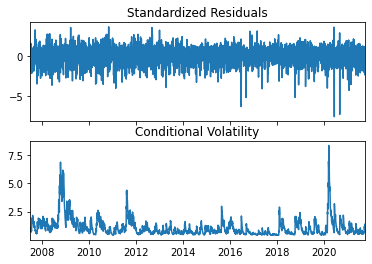

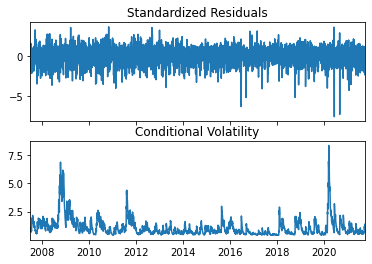

In [137]:
shock_skew_gm_model=arch_model(100*returns_df['spy'].dropna(), 
                     p=1, q=1, o=1,
                     mean='constant',
                     vol='GARCH',
                     dist='skewt'
                    )
shock_skew_gm_model
results_shock_skew_gm=shock_skew_gm_model.fit(update_freq=4)
print(results_shock_skew_gm.summary())

spy_volatility_forecast=results_shock_skew_gm.forecast(horizon=4, reindex=False)
results_shock_skew_gm.plot()


In [136]:
print(spy_volatility_forecast.variance)

                h.1       h.2       h.3       h.4
Date                                             
2007-07-03      NaN       NaN       NaN       NaN
2007-07-04      NaN       NaN       NaN       NaN
2007-07-05      NaN       NaN       NaN       NaN
2007-07-06      NaN       NaN       NaN       NaN
2007-07-09      NaN       NaN       NaN       NaN
...             ...       ...       ...       ...
2021-09-27      NaN       NaN       NaN       NaN
2021-09-28      NaN       NaN       NaN       NaN
2021-09-29      NaN       NaN       NaN       NaN
2021-09-30      NaN       NaN       NaN       NaN
2021-10-01  1.60693  1.621167  1.635326  1.649407

[3719 rows x 4 columns]


In [39]:
# Set the Signal column
gtd_tdf["Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit)
# where 1 is when the ^VIX is greater than 3.6%.
# where 0 is when the ^VIX  is less than 3.6%.
for index, row in gtd_tdf.iterrows():
    if row["^VIX"] > 0.036:
        gtd_tdf.loc[index, "Signal"] = 1.0
    if row["^VIX"] < 0.036:
        gtd_tdf.loc[index,"Signal"] =  0.0
# Review the DataFrame
gtd_tdf.head()        


,Leading_Indicators,PMI,CCI,Jobless_Claims,GDP,war,Impeachment,Catastrophe,Natural_disaster,Inflation,...,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-01,0.0,0.0,0.0,0.0,23.0,25.0,0.0,30.0,0.0,45.0,...,0.006378,0.004873,0.001238,-0.002165,-0.002771,0.002128,0.006874,-0.021481,0.004729,0.0
2007-10-01,18.0,0.0,0.0,0.0,14.0,50.0,0.0,12.0,0.0,65.0,...,-0.008889,0.011272,0.002316,0.005714,0.001197,0.005305,-0.000659,-0.017389,0.009238,0.0
2007-11-01,0.0,0.0,0.0,0.0,35.0,54.0,0.0,19.0,7.0,79.0,...,0.252563,-0.023408,0.001438,0.012993,0.008162,-0.008776,-0.024861,-0.011002,-0.008060,1.0
2008-01-01,17.0,0.0,0.0,0.0,22.0,68.0,0.0,21.0,0.0,52.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001523,0.0
2008-02-01,0.0,0.0,0.0,0.0,66.0,51.0,0.0,25.0,0.0,74.0,...,-0.083206,0.016088,0.003591,0.006011,0.003245,-0.022429,-0.011833,-0.030409,0.002438,0.0


In [40]:
# Define the target set y using the Signal column
y = gtd_tdf["Signal"].values
# Display a sample of y
y

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0.])

In [41]:
# Define features set X by selecting all columns but Signal
X = gtd_tdf.drop(columns=["Signal"])

# Review the features DataFrame
X.head()

,Leading_Indicators,PMI,CCI,Jobless_Claims,GDP,war,Impeachment,Catastrophe,Natural_disaster,Inflation,...,VIX,^VIX,spy,DX-Y.NYB,tlt,ief,gld,slv,CL=F,USDJPY=X
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-01,0.0,0.0,0.0,0.0,23.0,25.0,0.0,30.0,0.0,45.0,...,21.0,0.006378,0.004873,0.001238,-0.002165,-0.002771,0.002128,0.006874,-0.021481,0.004729
2007-10-01,18.0,0.0,0.0,0.0,14.0,50.0,0.0,12.0,0.0,65.0,...,10.0,-0.008889,0.011272,0.002316,0.005714,0.001197,0.005305,-0.000659,-0.017389,0.009238
2007-11-01,0.0,0.0,0.0,0.0,35.0,54.0,0.0,19.0,7.0,79.0,...,16.0,0.252563,-0.023408,0.001438,0.012993,0.008162,-0.008776,-0.024861,-0.011002,-0.008060
2008-01-01,17.0,0.0,0.0,0.0,22.0,68.0,0.0,21.0,0.0,52.0,...,18.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001523
2008-02-01,0.0,0.0,0.0,0.0,66.0,51.0,0.0,25.0,0.0,74.0,...,6.0,-0.083206,0.016088,0.003591,0.006011,0.003245,-0.022429,-0.011833,-0.030409,0.002438


In [138]:
X.cor()

NameError: name 'X' is not defined

In [42]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [43]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [44]:
# Define the the number of inputs (features) to the model
number_input_features = X.shape[1]

# Review the number of features
number_input_features

43

In [45]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [46]:
# Define the number of hidden nodes for the first hidden layer - use the square root of the number of input features times number of output neurons
hidden_nodes_layer1 =  int(np.ceil(np.sqrt(number_input_features * number_output_neurons)))

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

7

In [47]:
# Define the number of hidden nodes for the second hidden layer - hidden layer neurons divided by 2
hidden_nodes_layer2 =  int(np.floor(hidden_nodes_layer1/2))

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

3

In [48]:
# Create the Sequential model instance
nn = Sequential()

In [49]:
# Add the first hidden layer
nn.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation="relu"))

In [50]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [51]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [52]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 308       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Fit the model using 50 epochs and the training data
model_1 = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 1.2863 - accuracy: 0.2198
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 1.2445 - accuracy: 0.2198
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 1.2083 - accuracy: 0.2308
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 1.1701 - accuracy: 0.2418
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 1.1362 - accuracy: 0.2418
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.2637
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.2637
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 1.0389 - accuracy: 0.2637
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 1.0114 - accuracy: 0.2967
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.9800 - accuracy: 0.3077
Epoch 11/50
3/3 [======================

In [55]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.4443 - accuracy: 0.8710
Loss: 0.44430044293403625, Accuracy: 0.8709677457809448
